In [5]:
%matplotlib notebook

from pynsia.pointcloud import Deepmap
import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd

from pynsia.pointcloud import PointCloud

<IPython.core.display.Javascript object>


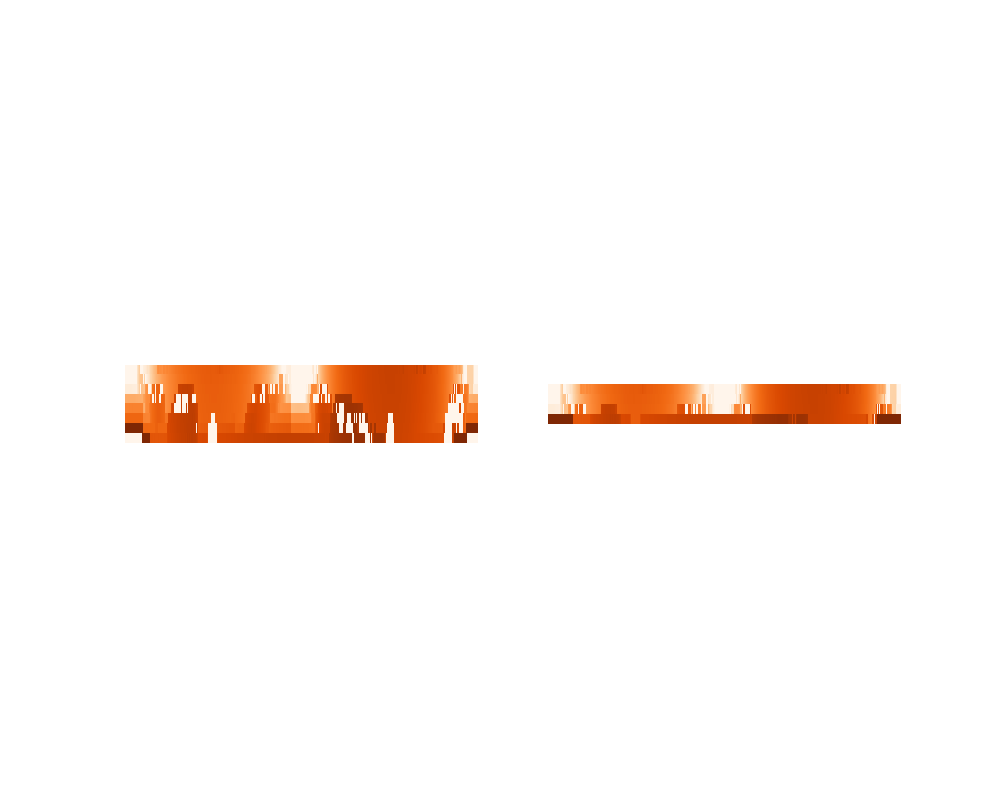

KeyboardInterrupt: 

In [18]:
df = pd.read_csv('/media/blazaid/Saca/Phd/data/sync/miguel/training/dataset.csv')

fig, axs = plt.subplots(1, 2, figsize=(10,8))

fig.show()

for (_, row) in df.iterrows():
    if not pd.isnull(row['pointclouds_path']):
        pc = PointCloud.load(os.path.join('/media/blazaid/Saca/Phd/data/sync', row['pointclouds_path'])).transform(**{'rot_y': 3.1, 'rot_z': -3.1})

        dms = [
            pc.to_deepmap(h_range=(0, 360), v_range=v_range, h_res=1, v_res=2).normalize(orig=[-25, 25], dest=[1, 0])
            for v_range in [(-15, 3), (-7, 3)]
        ]
        for dm, ax in zip(dms, axs):
            ax.clear()
            ax.imshow(dm.matrix, cmap='Oranges')
            ax.set_aspect(10)
            ax.set_axis_off()

        fig.canvas.draw()

In [ ]:
df1 = pd.read_csv('/home/blazaid/Projects/data-phd/curated/lc_miguel_validation_00000.csv')
df2 = pd.read_csv('/home/blazaid/Projects/data-phd/curated/lc_miguel_validation_00010.csv')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,8))
fig.show()

for (_, row1), (_, row2) in zip(df1.iterrows(), df2.iterrows()):
    dm1 = Deepmap.load(os.path.join('/home/blazaid/Projects/data-phd/curated', row1['Deepmap']))
    dm2 = Deepmap.load(os.path.join('/home/blazaid/Projects/data-phd/curated', row2['Deepmap']))

    ax1.clear()
    ax1.imshow(dm1.matrix, interpolation='gaussian', cmap='Oranges')
    ax1.set_aspect(10)
    ax1.set_axis_off()
    ax2.clear()
    ax2.imshow(dm2.matrix, interpolation='gaussian', cmap='Oranges')
    ax2.set_aspect(10)
    ax2.set_axis_off()
    fig.canvas.draw()